In [1]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc as pm

In [2]:
def gen_sample(n, mus, sigmas):
    return np.array([mus + stats.norm.rvs(size = n, loc = 0, scale = sigmas[i]) for i in np.arange(len(sigmas)) ])

def gen_mus_sigma(nb_stateux, nb_samples):
    return (stats.uniform.rvs(size=nb_samples, loc=0, scale=200), stats.uniform.rvs(size=nb_stateux, loc=0, scale=40))

nb_stateux = 7
sample_length = 10

(mus, sigma) = gen_mus_sigma(nb_stateux, sample_length)
sample = gen_sample(sample_length, mus, sigma)
print len(sample), len(sample[0])
print mus
print sigma
print sample
print [np.mean([sample[i, j] for i in np.arange(len(sigma))]) for j in np.arange(len(mus))]


7 10
[ 162.34594135  190.91059633   48.68890852  180.80032926  184.08695339
  166.70107293   92.98812439  164.50064471   15.22837302   82.68332558]
[ 35.85190998   0.43208206   1.51307061   2.16716287  22.64086809
  23.91798262  35.94924107]
[[  1.84989430e+02   1.87517705e+02   3.03585254e+01   1.96559668e+02
    1.70427434e+02   1.92333571e+02   1.21761724e+02   1.64488211e+02
    1.74073218e-01   1.42813271e+02]
 [  1.62201621e+02   1.91047600e+02   4.82117971e+01   1.80889771e+02
    1.84099111e+02   1.66442092e+02   9.38280172e+01   1.64393566e+02
    1.44943183e+01   8.20631061e+01]
 [  1.63753083e+02   1.88795902e+02   5.05897371e+01   1.77017012e+02
    1.86686465e+02   1.69548665e+02   9.34639876e+01   1.65767417e+02
    1.73345120e+01   8.20075463e+01]
 [  1.66188007e+02   1.88551645e+02   4.47459330e+01   1.79164341e+02
    1.82564477e+02   1.65666472e+02   9.26868717e+01   1.65287395e+02
    1.64552731e+01   8.18749758e+01]
 [  2.18639361e+02   1.84648843e+02   7.28638679e+

In [6]:
v_mus = np.array([pm.Uniform("mu%d" % i, lower=0, upper=200) for i in np.arange(sample_length)])
v_sigmas = [pm.Uniform("sigma%d" % k, lower=0, upper=40) for k in np.arange(nb_stateux)]

v_taus = [pm.Lambda("tau%d" % k, lambda sigma=v_sigmas[k]: 1/sigma**2) for k in np.arange(nb_stateux)]

x = np.array([[pm.Normal("x%d_%d" % (k,i), mu=v_mus[i], tau=v_taus[k], 
                         observed=True, value=np.array(sample[k,i])) for i in np.arange(sample_length)]
              for k in np.arange(nb_stateux)])

print x.shape

(7L, 10L)


In [7]:
mcmc = pm.MCMC([v_mus, v_sigmas, v_taus, x])
mcmc.sample(10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 51.5 sec

162.413615039
189.805931567
47.7941786366
179.805706323
183.891397395
166.830501426
93.6059913656
164.816573219
15.545401982
82.2679622888
[162.41361503908541, 189.80593156710265, 47.794178636615307, 179.80570632297974, 183.89139739487149, 166.83050142556738, 93.605991365602762, 164.81657321905419, 15.545401982005021, 82.267962288767379]


C:\Anaconda\envs\py27\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


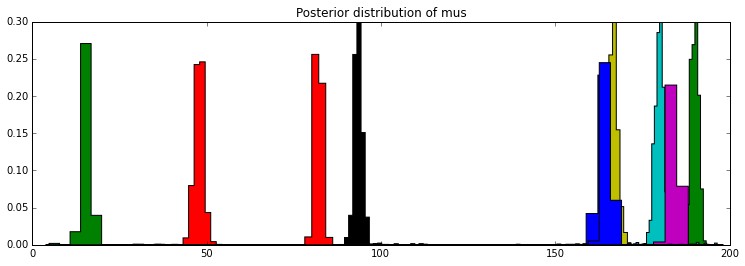

In [8]:
figsize(12.5, 4)
plt.title("Posterior distribution of mus")
for i in np.arange(sample_length):
    plt.hist(mcmc.trace("mu%d" % i)[:], bins=50, histtype="stepfilled", normed=True)
    plt.legend()
    plt.xlim((0,200))
    print (mcmc.trace("mu%d" % i)[:].mean())

print [mcmc.trace("mu%d" % j)[:].mean() for j in np.arange(sample_length)]

In [ ]:
x = np.array([[1,2], [1,3], [1,4]])
print x
y = np.array([10, 20, 30])
print y
print x+y.reshape(len(y), 1)
print type(x), len(x), x.shape